#### Mar 29 Exploration: Project selected topic

* Explained topic, out of 5: 4
* Did related computation, out of 5: 5

Total, out of 10: 9

# March 29 Exploration

## By Daniel Safavisohi

I tried to reproduce part of the numerical experiment presented in the paper. I used CubicHermiteSpline and barycentric\_interpolate function from SciPy library. I am looking for a way to combine these methods.


In [9]:
# First step is to compute first derivative of the test function 
from sympy import symbols, exp, sin, cos, diff

x = symbols('x')
f = exp(2*sin(x) + cos(x))
df = diff(f, x)
df

(-sin(x) + 2*cos(x))*exp(2*sin(x) + cos(x))

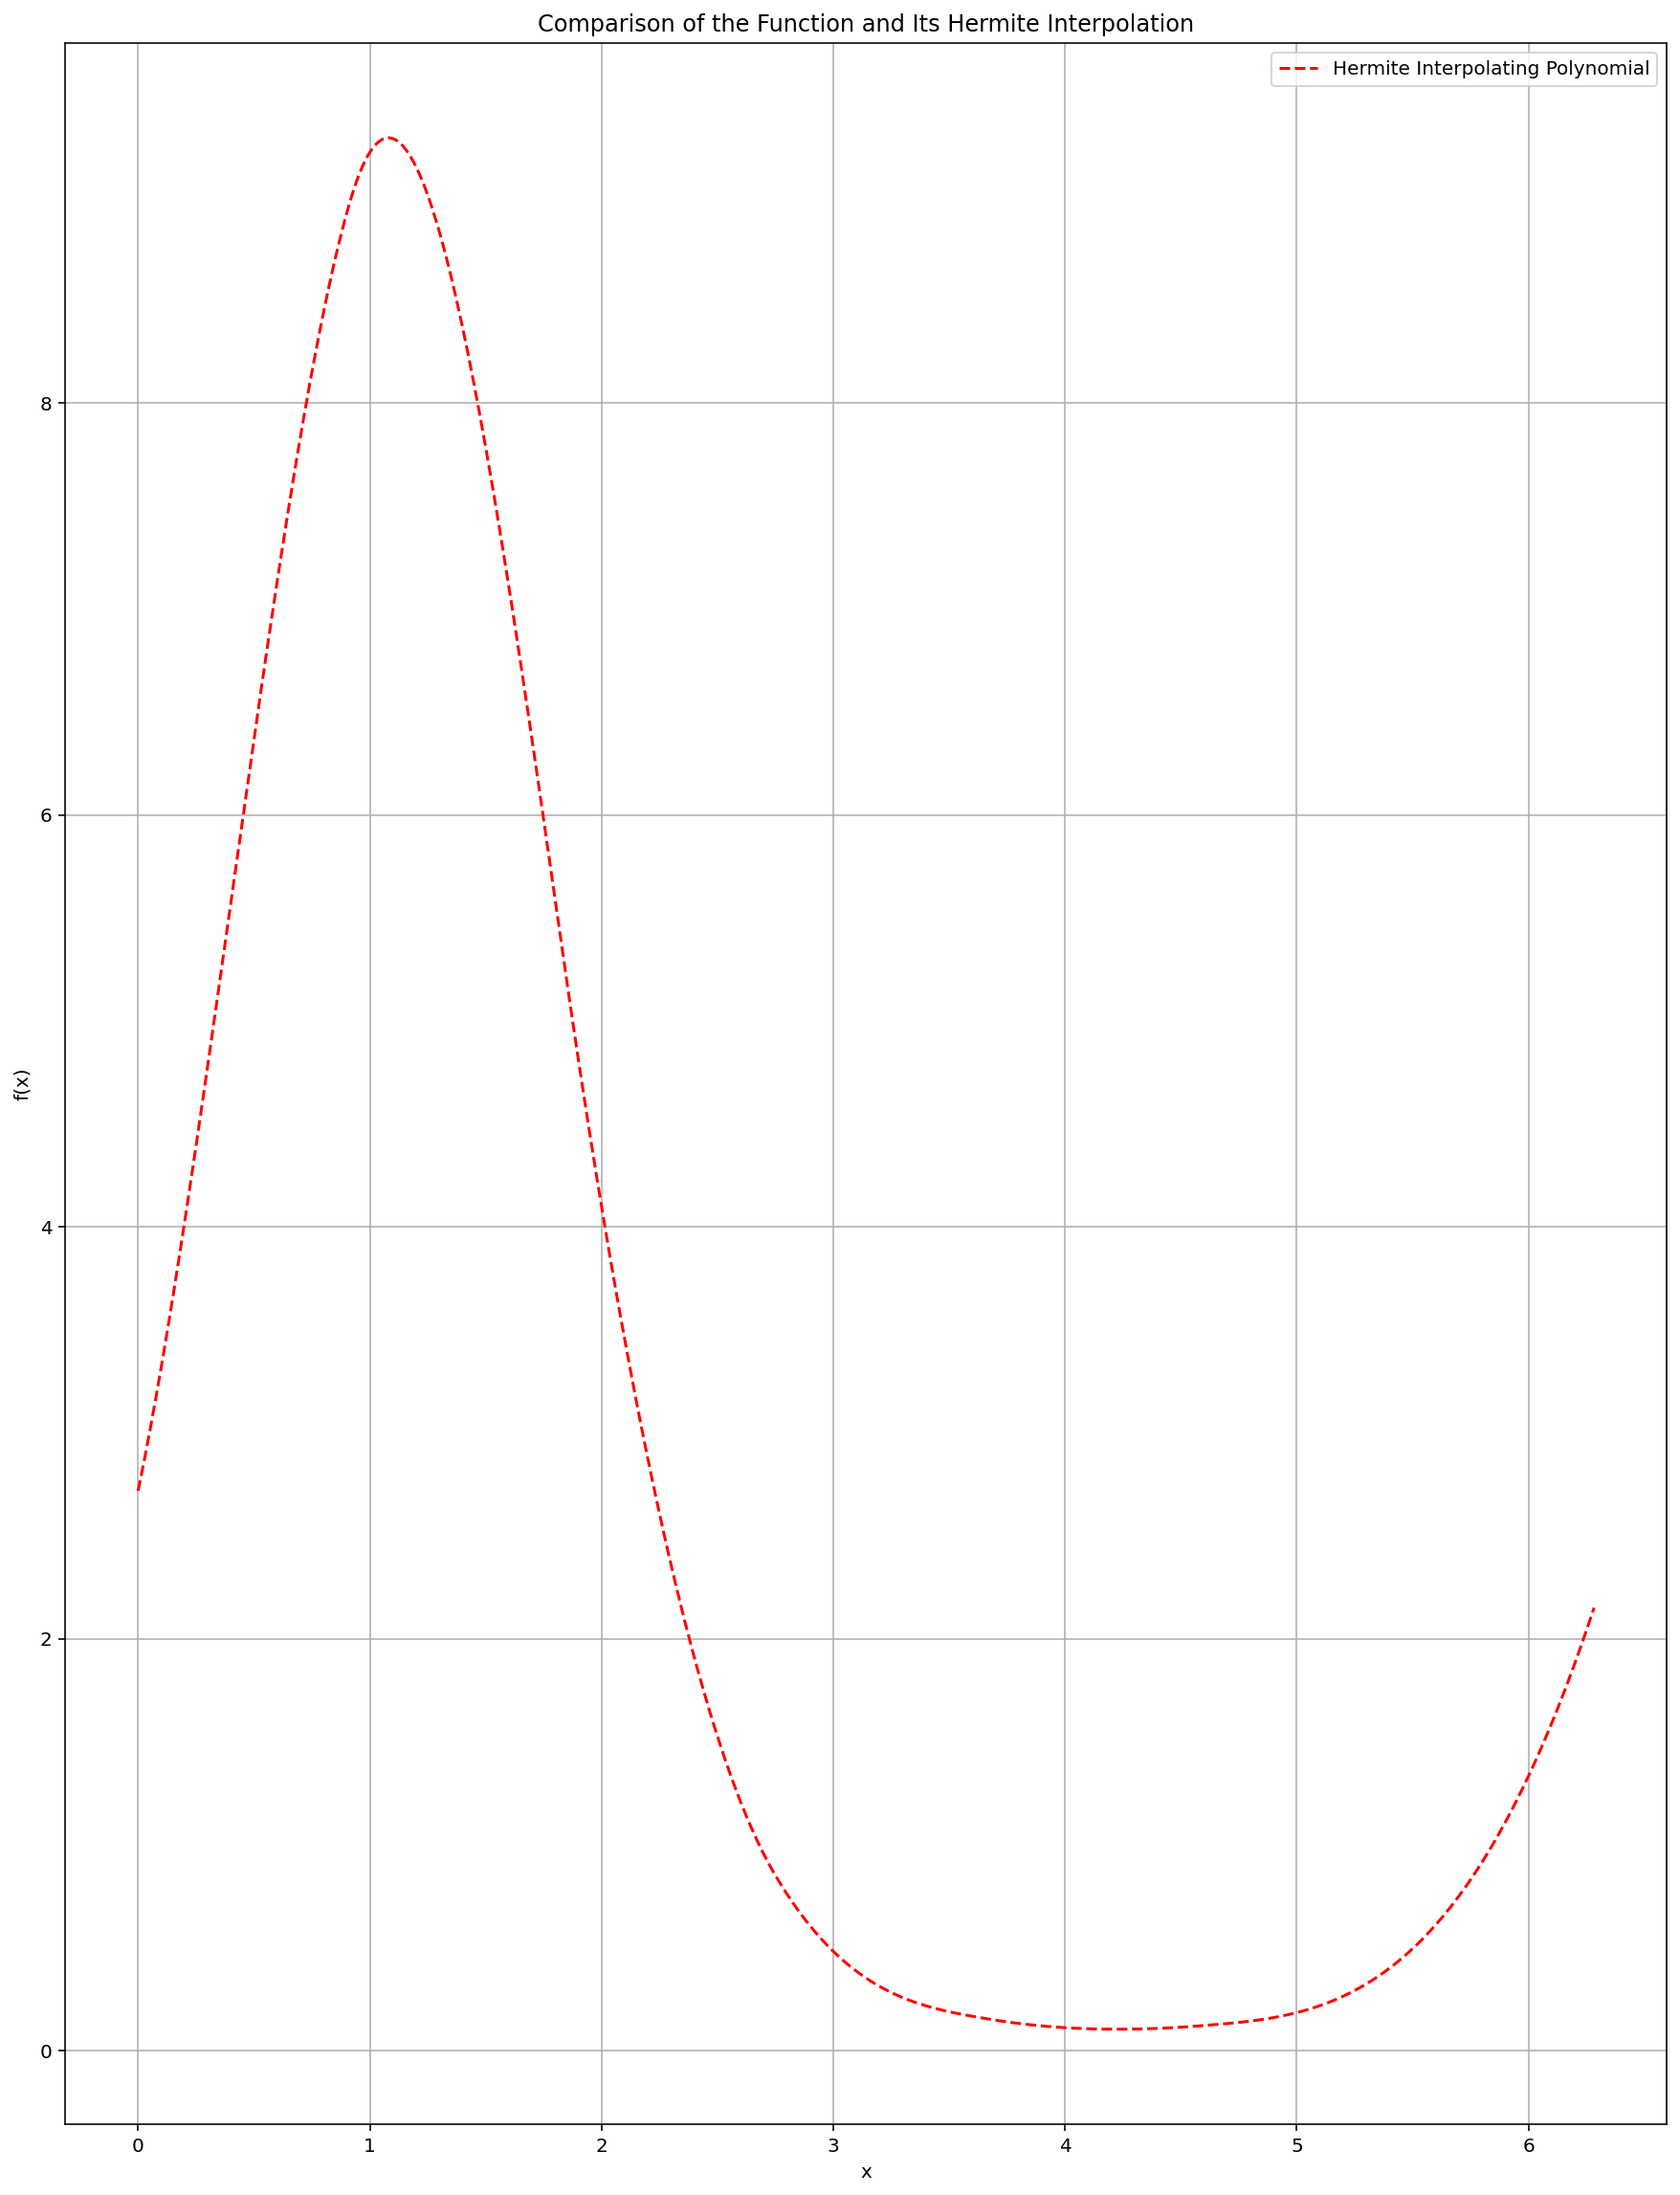

In [10]:
# Next step is to compute Hermite interpolation and graph the result
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicHermiteSpline

# Define the function
def f(x):
    return np.exp(2*np.sin(x) + np.cos(x))

# Define the derivative of the function. I used diff form scipy and then translate it to code
def df(x):
    return (-np.sin(x)+2*np.cos(x))*np.exp(2*np.sin(x) + np.cos(x))

# Sample points
x_samples = np.linspace(0, 5.5, 7)
y_samples = f(x_samples)
dy_samples = df(x_samples)

# Create the Hermite Interpolator
hermite_interpolator = CubicHermiteSpline(x_samples, y_samples, dy_samples)

# Generate points
x_interp = np.linspace(0, 2*np.pi, 500)
y_interp = hermite_interpolator(x_interp)

# Plot the function and the interpolating polynomial
plt.figure(figsize=(15, 20))
#plt.plot(x_interp, f(x_interp), label='Original function', color='blue')
plt.plot(x_interp, y_interp, label='Hermite Interpolating Polynomial', color='red', linestyle='--')
#plt.scatter(x_samples, y_samples, color='black', zorder=5)
plt.title('Comparison of the Function and Its Hermite Interpolation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
f(5) , f(5.001), f(4.9999)

(0.19511105614056193, 0.1954092311084125, 0.195081281208467)

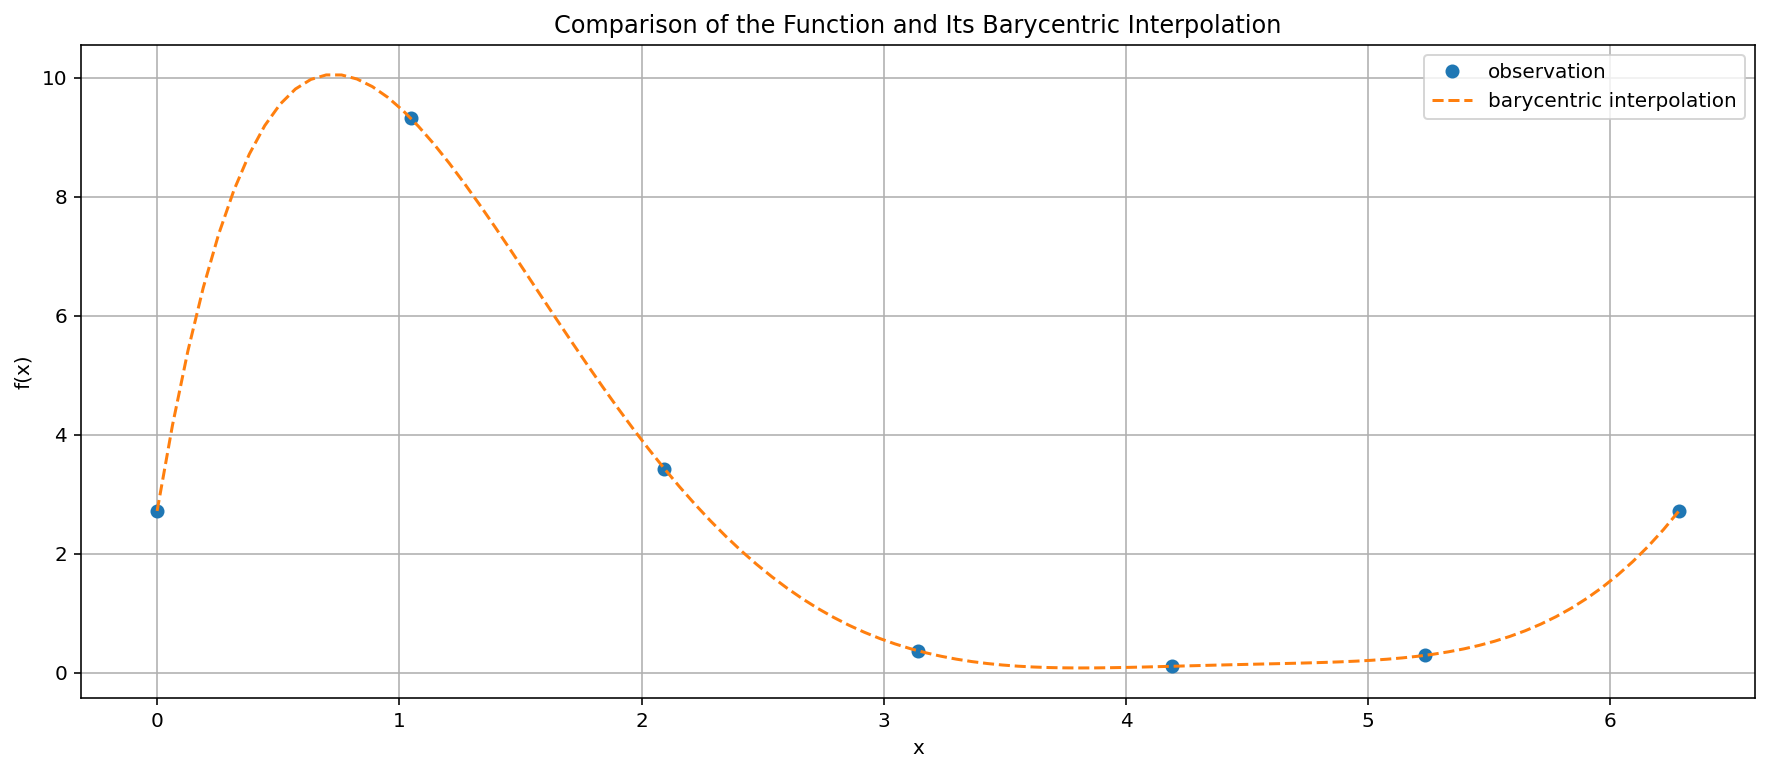

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate
x_observed = np.linspace(0, 2*np.pi, 7)
y_observed = f(x_observed)
x = np.linspace(0, 2*np.pi, num=100)
y = barycentric_interpolate(x_observed, y_observed, x)
plt.figure(figsize=(15, 6))

plt.plot(x_observed, y_observed, "o", label="observation")
plt.plot(x, y, label="barycentric interpolation",linestyle='--')
plt.title('Comparison of the Function and Its Barycentric Interpolation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()